Introduction

The Crime Incident Report is provided by Toronto Police Services (TPS) to record preliminary details of incidents to which TPS officers respond. It is a dataset containing records from the new Crime Incident Reporting System, which includes a reduced set of fields focused on capturing the type of incident and when and where it occurred. (Records begin in 2004 and continue through 2022).

In [27]:
import pandas as pd
import seaborn as sns
import sys, os
from matplotlib import rcParams
import matplotlib.pyplot as plt

Data cleaning

In [28]:
TPS = pd.read_csv('https://raw.githubusercontent.com/ZorroHZR/MMAI-5000/main/Group%20Project%20Data-SFD%20Data-Toronto%20Police.csv')

In [29]:
TPS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

Toronto Police Sevice Data includes 20 features that are:

1  EVENT_UNIQUE_ID : Offence Number
2  OCC_DATE  : Date Offence Occurred (time is displayed in UTC lormat when downloaded as a CSV)
3  OCC_YEAR  : Year Offence Occurred
4  OCC_MONTH : Month Offence Occurred        
5  OCC_DOW   : Day of the Week Offence Occurred      
6  OCC_DOY   : Day of the Year Offence Occurred          
7  OCC_DAY   : Day of the Month Offence Occurred       
8  OCC_HOUR  : Hour of Day Offence Occurred         
9  OCC_TIME_RANGE :Time Range of Day Offence Occurred             
10 DIVISION  : Police Division where Offence Occurred   
11 DEATH :Count of Deaths caused by the Shooting    
12 INJURIES  : Count of Injured Persons caused by the Shooting           
13 HOOD_158  : Identifier of Neighbourhood using Cily of Toronto's new 158 neighbourhood structure          
14 NEIGHBOURHOOD_158 : Name of Neighbourhood using City of Toronto's new 158 neighbourood structure        
15 HOOD_140   : Identifier of Neighbourhood using City of Toronto's old 140 neighbourhood structure
16 NEIGHBOURHOOD_140  : Name of Neighbourhood using City of Toronto's old 140 neighbourhood structure          
17 LONG_WGS84  :longitude Coordinates (Offset to nearest intersection)
18  LAT_WGS84  : Latitude Coordinates (Offset to nearest intersection)     

In [30]:
print(TPS.shape)
print(TPS.columns)

(5707, 21)
Index(['X', 'Y', 'OBJECTID', 'EVENT_UNIQUE_ID', 'OCC_DATE', 'OCC_YEAR',
       'OCC_MONTH', 'OCC_DOW', 'OCC_DOY', 'OCC_DAY', 'OCC_HOUR',
       'OCC_TIME_RANGE', 'DIVISION', 'DEATH', 'INJURIES', 'HOOD_158',
       'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84',
       'LAT_WGS84'],
      dtype='object')


In [31]:
print(TPS.isna().sum())

X                    0
Y                    0
OBJECTID             0
EVENT_UNIQUE_ID      0
OCC_DATE             0
OCC_YEAR             0
OCC_MONTH            0
OCC_DOW              0
OCC_DOY              0
OCC_DAY              0
OCC_HOUR             0
OCC_TIME_RANGE       0
DIVISION             0
DEATH                0
INJURIES             0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64


Based on this we can know that there is no missing values.

In [32]:
TPS.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075


Total Case by year

In [43]:
years = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
counts = {}
for year in years:
    counts[year] = TPS[TPS['OCC_YEAR'] == year].shape[0]
for year, count in counts.items():
    print(f"{year} Total Case ：{count}")

2004 Total Case ：191
2005 Total Case ：262
2006 Total Case ：215
2007 Total Case ：207
2008 Total Case ：238
2009 Total Case ：252
2010 Total Case ：259
2011 Total Case ：227
2012 Total Case ：219
2013 Total Case ：204
2014 Total Case ：177
2015 Total Case ：288
2016 Total Case ：407
2017 Total Case ：392
2018 Total Case ：427
2019 Total Case ：492
2020 Total Case ：462
2021 Total Case ：409
2022 Total Case ：379


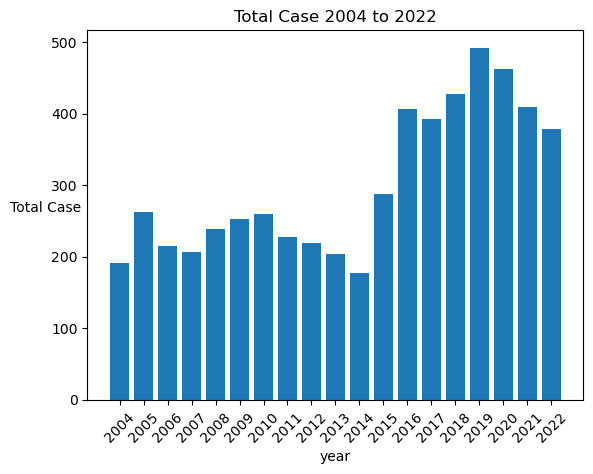

In [70]:
plt.bar(counts.keys(), counts.values())
plt.xlabel('year')
plt.ylabel('Total Case', rotation= 0)
plt.title('Total Case 2004 to 2022')
plt.xticks(years, rotation=45)
plt.show()

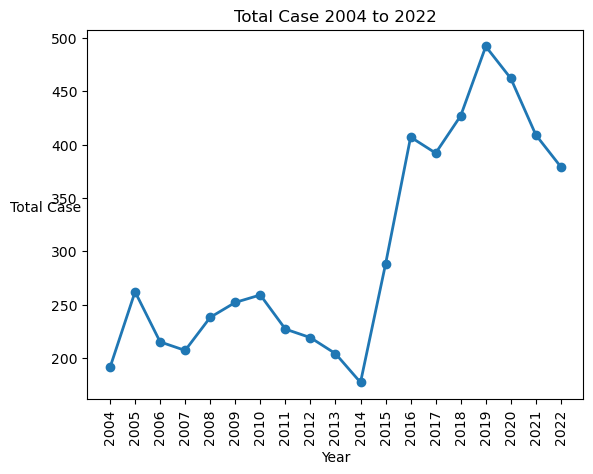

In [73]:
plt.plot(counts.keys(), counts.values(), marker='o', linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Total Case', rotation= 0)
plt.title('Total Case 2004 to 2022')
plt.xticks(list(counts.keys()), list(counts.keys()), rotation=90)
plt.show()